In [1]:
from IPython.display import Markdown, display
display(Markdown("header-project.md"))

header-project.md

## **[GROUP WORK] Project step 02: multivariate staisticss**

In order to prepare the data science project that will need to complete, gather in project group and answer the following questions:

Start from your clean data set (from yesterday)


## How are the different variables related to each other two by two ?

1. Compute the correlation matrix of all the quantitative variables.
4. You should be able de get rid of a quite useless column (obvious one)
Another column was artificially generated, can you find out which one ? Once you found it get rid of it!
2. Display scatter plot matrix
3. Display the most important correlations with the target variable : \<Median_House_Value> <br>
Why is it pertinent to choose this variable as outcome (target) ?


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# Load the dataset
os.chdir("/Users/peiwenliu/Desktop/dsais/datacleaning/")
df = pd.read_csv("california_houses_cleaned.csv")

# Display the first few rows
df.head(3)


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Tot_No_Bedrooms,Max_Age,Closest_City
0,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,8259.085109,1277.0,66.0,SanFrancisco
1,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,7768.086571,1039.0,63.0,SanFrancisco
2,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,7768.086571,1347.0,68.0,SanFrancisco


In [4]:
# Compute the correlation matrix of all the quantitative variables

# correlation matrix without the columns 'Closest_city','Latitude','Longitude' as they are not quantitative variables
correlation_matrix = df.drop(columns=['Closest_City','Latitude','Longitude']).corr()

correlation_matrix

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Tot_No_Bedrooms,Max_Age
Median_House_Value,1.000000,0.622282,0.117334,0.124442,0.073900,-0.012860,0.088517,-0.479158,0.134094,0.114456
Median_Income,0.622282,1.000000,-0.159188,0.226504,0.029551,0.038882,0.053391,-0.251217,0.269081,-0.155027
Median_Age,0.117334,-0.159188,1.000000,-0.364831,-0.323375,-0.297476,-0.305292,-0.230571,-0.367700,0.972519
Tot_Rooms,0.124442,0.226504,-0.364831,1.000000,0.934499,0.859147,0.921687,0.003672,0.996397,-0.353240
Tot_Bedrooms,0.073900,0.029551,-0.323375,0.934499,1.000000,0.876740,0.979512,-0.025216,0.900939,-0.312778
Population,-0.012860,0.038882,-0.297476,0.859147,0.876740,1.000000,0.906370,-0.043262,0.838451,-0.288234
Households,0.088517,0.053391,-0.305292,0.921687,0.979512,0.906370,1.000000,-0.065340,0.890203,-0.295670
Distance_to_coast,-0.479158,-0.251217,-0.230571,0.003672,-0.025216,-0.043262,-0.065340,1.000000,0.010484,-0.225504
Tot_No_Bedrooms,0.134094,0.269081,-0.367700,0.996397,0.900939,0.838451,0.890203,0.010484,1.000000,-0.356095
Max_Age,0.114456,-0.155027,0.972519,-0.353240,-0.312778,-0.288234,-0.295670,-0.225504,-0.356095,1.000000


In [14]:
### select out pairs with a correlation of more than 0.3 and lower than 0.9 for further investigation
### as a pearson's r lower than 0.3 indicates small effect size
### and a pearson's r higher than 0.9 indicates multicollinearity

filtered_matrix = correlation_matrix.copy()

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        value = correlation_matrix.at[row, col]
        if (0.3 < value < 0.9) or (-0.9 < value < -0.3):
            filtered_matrix.at[row, col] = round(value, 2)
        else:
            filtered_matrix.at[row, col] = ""
            
filtered_matrix

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Tot_No_Bedrooms,Max_Age
Median_House_Value,,0.62,,,,,,-0.48,,
Median_Income,0.62,,,,,,,,,
Median_Age,,,,-0.36,-0.32,,-0.31,,-0.37,
Tot_Rooms,,,-0.36,,,0.86,,,,-0.35
Tot_Bedrooms,,,-0.32,,,0.88,,,,-0.31
Population,,,,0.86,0.88,,,,0.84,
Households,,,-0.31,,,,,,0.89,
Distance_to_coast,-0.48,,,,,,,,,
Tot_No_Bedrooms,,,-0.37,,,0.84,0.89,,,-0.36
Max_Age,,,,-0.35,-0.31,,,,-0.36,


#### Interpretation 
Only Median Income and Distance to Coast display substantial correllation with Median House Value <br>
Population, Tot Room, Tot_Bedrooms, Households, Tot No Bedrooms display signs of multicollinearity

In [15]:
# Drop the columns 'Tot_No_Bedrooms', 'Max_Age', 'Households' to avoid multicolinearity with 'Tot_Rooms', 'Median_Age', 'Population'
# 'Tot_Bed_Rooms' and 'Population' also correlates substantially with Tot_Rooms, but it is used for later analysis, so is kept here
# Drop non-quantitatvie columns Closest_City','Latitude','Longitude'
df_cleaned = df.drop(columns=['Tot_No_Bedrooms', 'Max_Age','Closest_City','Latitude','Longitude'])

# Display the first few rows of the cleaned dataset
df_cleaned.head(3)


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
0,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,8259.085109
1,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,7768.086571
2,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,7768.086571


What are the predictors of \<Median_House_Value> worthy of interest and the nature of their relationship with the target ? <br>
**Provide the scatter plots of those predictors with the target**

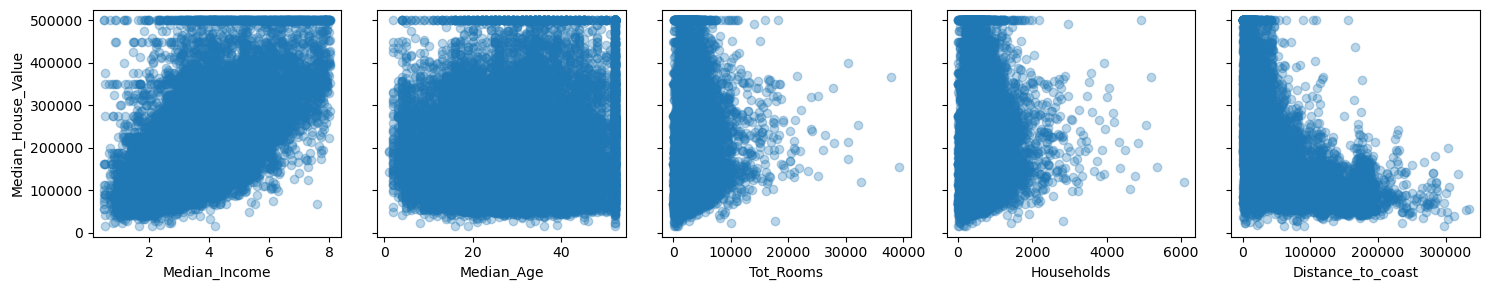

In [16]:
col_to_plot = df_cleaned.columns
fig,ax=plt.subplots(nrows=1, ncols=5, figsize=(15,3))

ax[0].scatter(df_cleaned['Median_Income'],df_cleaned['Median_House_Value'], alpha=0.3)
ax[0].set_xlabel('Median_Income')
ax[0].set_ylabel('Median_House_Value')
ax[1].scatter(df_cleaned['Median_Age'],df_cleaned['Median_House_Value'],alpha=0.3)
ax[1].set_xlabel('Median_Age')
ax[1].set_yticklabels([]) 
ax[2].scatter(df_cleaned['Tot_Rooms'],df_cleaned['Median_House_Value'],alpha=0.3)
ax[2].set_xlabel('Tot_Rooms')
ax[2].set_yticklabels([]) 
ax[3].scatter(df_cleaned['Households'],df_cleaned['Median_House_Value'],alpha=0.3)
ax[3].set_yticklabels([]) 
ax[3].set_xlabel('Households')
ax[4].scatter(df_cleaned['Distance_to_coast'],df_cleaned['Median_House_Value'],alpha=0.3)
ax[4].set_xlabel('Distance_to_coast')
ax[4].set_yticklabels([]) 

plt.tight_layout()

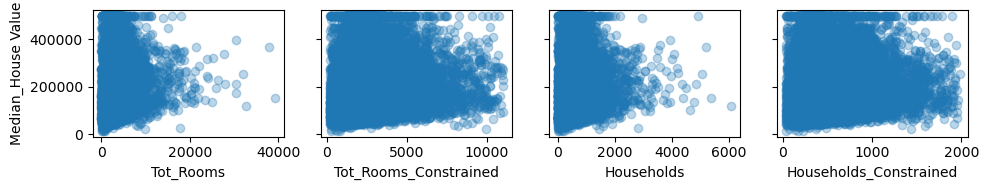

In [17]:
### plots to further investigate Tot_Rooms and Households, excluding the top and bottom percent 
c1 = (df_cleaned['Tot_Rooms'] > np.percentile(df_cleaned['Tot_Rooms'], 99)) | (df_cleaned['Tot_Rooms'] < np.percentile(df_cleaned['Tot_Rooms'], 1))
c2 = (df_cleaned['Households'] > np.percentile(df_cleaned['Households'], 99)) | (df_cleaned['Households'] < np.percentile(df_cleaned['Households'], 1))

dfc1 = df_cleaned[~(c1|c2)]

col_to_plot = list(df_cleaned.columns)
fig,ax=plt.subplots(nrows=1, ncols=4, figsize=(10,2))

ax[0].scatter(df_cleaned['Tot_Rooms'],df_cleaned['Median_House_Value'],alpha=0.3)
ax[0].set_xlabel('Tot_Rooms')
ax[0].set_ylabel('Median_House Value')

ax[1].scatter(dfc1['Tot_Rooms'],dfc1['Median_House_Value'],alpha=0.3)
ax[1].set_xlabel('Tot_Rooms_Constrained')
ax[1].set_yticklabels([]) 

ax[2].scatter(df_cleaned['Households'],df_cleaned['Median_House_Value'],alpha=0.3)
ax[2].set_xlabel('Households')
ax[2].set_yticklabels([]) 

ax[3].scatter(dfc1['Households'],dfc1['Median_House_Value'],alpha=0.3)
ax[3].set_xlabel('Households_Constrained')
ax[3].set_yticklabels([]) 


plt.tight_layout()

**What special observations are you drawing from these scatter plots?**

Is the total number of rooms or bedrooms per district meaningful ? <br>
If so explain why, if not what are your suggestions ?

1.Median Income: The previously calculated high correlation coefficient of 0.62 with median house value suggests a strong positive correlation.
In the scatter plot, it is evident that as median income increases, median house value in the district tends to rise. We can hypothesize that this might be due to higher-income individuals preferring to reside in higher-priced neighborhoods, or that a wealthier population can drive up housing prices within an area.

2.Distance to Coast: With a correlation coefficient of -0.48, there appears to be a moderate negative correlation. As the distance to the coast decreases, median house value tends to increase. This observation could be attributed to the fact that coastal areas in California tend to be more developed, attracting more residents and consequently driving up property values. Additionally, wealthier areas near the coast may exhibit higher consumer spending and income levels, contributing to increased property values compared to areas farther from the coast.

3.Median Age: There doesn't seem to be a noticeable correlation with median house value, as the correlation coefficient is less than 0.2. It's likely that households in the area have a wide range of ages, possibly reflecting diverse family compositions. As a result, median age may not have a significant impact on house values.

4.Total Rooms and Households: Both variables exhibit correlation coefficients of less than 0.2, indicating no clear correlation with median house value. Although there are a few large values that distorts the scatter plot, these values were filtered out temporarily to provide a better assessment of the scatterplot, which still does not reveal any visible correlation with median house value.

#### Is the total number of rooms or bedrooms per district meaningful ?

No, there are a few reasona why the variables are not indicative of house price.
For instance, some expensive houses may have a large number of rooms, but the distribution of such houses in a given area might be scarce. 
Alternatively, certain areas may attract a transient population of students and workers, resulting in a high number of rooms or bedrooms, which could confound the assessment of housing prices in the data.

#### If so explain why, if not what are your suggestions ?
 
We can add or transform features in order to obtain more relevant features. For example:

1.Rooms per Household: Calculate the average number of rooms per household for each neighborhood and compare it with housing prices. This can help identify associations between the size of living spaces within a neighborhood and pricing. It may reveal areas where affluent households with larger living spaces per capita are possibly driving higher prices.

2.Bedrooms per Rooms: Compute the proportion of bedrooms to total rooms for each neighborhood. The higher the density of bedrooms, indicates lower per person living space in the district. For districts near city centers, lower per person living space should have relatively low impact on house price as location should be the dominant factor. But as the district situates further from city centers, lower per person living space should have an increasingly negative effect on house price.

3.People per Household: Analyze the average number of residents per household in each neighborhood to determine whether population density correlates with house prices. High-density areas, such as those inhabited by students and transient populations, might exhibit different price dynamics compared to areas with lower population density and higher-income residents.

4.House turnover rate: The activenss of housing market within a district could also impact house price, a higher rate of buy and sell of houses usually contribute to price rallies 

## Explore new variables

**Create three new variables :**
1. Rooms per household
2. Bedrooms per rooms
4. People per household

**Let us again look at the correlation between the predictors and the target**

What is your conclusion?

Do not forget to save your dataset!

In [19]:
df_cleaned['Rooms per household'] = df_cleaned['Tot_Rooms'] /df_cleaned['Households'] 
df_cleaned['Bedrooms per rooms'] = df_cleaned['Tot_Bedrooms'] /df_cleaned['Tot_Rooms'] 
df_cleaned['People per household'] = df_cleaned['Population'] /df_cleaned['Households'] 

df_new = pd.DataFrame(df_cleaned,columns=['Median_House_Value', 'Rooms per household', 'Bedrooms per rooms', 'People per household'])


correlation_matrix2 = df_new.corr().round(3)
correlation_matrix2


,Median_House_Value,Rooms per household,Bedrooms per rooms,People per household
Median_House_Value,1.000,0.090,-0.177,-0.039
Rooms per household,0.090,1.000,-0.393,0.001
Bedrooms per rooms,-0.177,-0.393,1.000,-0.004
People per household,-0.039,0.001,-0.004,1.000


#### Conclusion

Rooms per Household (0.090) There is a very weak positive correlation between the number of rooms per household and median house value, indicating negligible impact on house value.

Bedrooms per Rooms (-0.177) There is a small negative correlation between the ratio of bedrooms to total rooms and median house value. This indicates that houses where the propertion of bedrooms to total rooms is lower tend to have higher median values. This could imply that larger living spaces or a lower emphasis on bedrooms contribute to higher house values.

People per Household (-0.039) There is a very weak negative correlation between the umber of people per household and median house value, indicating negligible impact on house value.

In conclusion, none of these correlations are not particularly strong. 
This implies that while there are some connections between the these factors and house values, there are likely other  variables that are more influential. To develop a more robust predictive model for median house values, additional factors and a more comprehensive approach may be necessary.